# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [5]:
medical.shape

(1338, 8)

In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

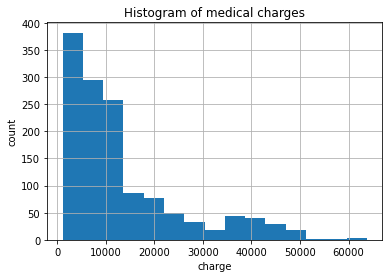

In [9]:
_ = medical.charges.hist(bins = 15)

_ = plt.xlabel('charge')
_ = plt.ylabel('count')
_ = plt.title('Histogram of medical charges')


## From the book glossary (Art of Statistics)
confidence interval: an estimated interval within which an unknown parameter may plausibly lie. If a 95% confidence interval for μ has lower limit L(x) and upper limit U(x) then, before observing the data, there is a 95% probability that the random interval (L(X), U(X)) contains μ. The Central Limit Theorem, combined with the knowledge that close to 95% of a normal distribution lies between the mean ± 2 standard deviations, means that a common approximation for a 95% confidence interval is the estimate ± 2 standard errors. Suppose we want to find a confidence interval for the difference μ2 − μ1 between two parameters μ2 and μ1. If T1 is an estimator of μ1 with standard error SE1, and T2 is an estimator of μ2 with standard error SE2, then T2 − T1 is an estimator of μ2 − μ1. The variance of the difference between two estimators is the sum of their variances, and so the standard error of T2 − T1 is given by image. From this a 95% confidence interval for the difference μ2 − μ1 can be constructed.

## from wiki t test
(https://en.wikipedia.org/wiki/Student%27s_t-test)
One-sample t-test
In testing the null hypothesis that the population mean is equal to a specified value μ0, one uses the statistic

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{s/{\sqrt {n}}}}}$
where ${\displaystyle {\bar {x}}}$ is the sample mean, s is the sample standard deviation and n is the sample size. The degrees of freedom used in this test are n − 1. Although the parent population does not need to be normally distributed, the distribution of the population of sample means ${\displaystyle {\bar {x}}}$ is assumed to be normal.

By the central limit theorem, if the observations are independent and the second moment exists, then ${\displaystyle t}$ will be approximately normal N(0;1).

In [14]:
sample_mean = np.mean(medical.charges)
sample_mean

13270.422265141257

In [17]:
sample_std = np.std(medical.charges, ddof=1)
sample_std

12110.011236693994

In [18]:
std_error = sample_std/np.sqrt(1338)
std_error

331.06745431568226

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ A one sided t test? 
# Question

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one sided interval would be appropriate (as they are concerned with it following below 12000, not above a certain number). We can procede with the null hypothesis that the mean is 12000, and the alternative hypothesis that the mean is > 12000

i.e. 
$$
H_0 : \mu = 12000 \\
H_1 : \mu > 12000
$$

In [21]:
t = (sample_mean - 12000)/std_error
t

3.837351719658534

this is greater than the t-value of 1.65 corresponding to a one sided 95% confidence level

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that the people with insurance and people without insurance are charged the same amount. The alternative hypothesis is that they are not charged the same amount

i.e. 
$$
H_0 : \bar{x}_0 = \bar{x}_1, \\
H_1 : \bar{x}_0 \neq \bar{x}_1
$$

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [23]:
insured = medical[medical.insuranceclaim != 0]
uninsured = medical[medical.insuranceclaim == 0]

In [24]:
insured.shape

(783, 8)

In [25]:
uninsured.shape

(555, 8)

In [26]:
783+555

1338

In [30]:
n0 = 783
n1 = 555
s0 = np.std(insured.charges, ddof = 1)
s1 = np.std(uninsured.charges, ddof = 1)
x0 = np.mean(insured.charges)
x1 = np.mean(uninsured.charges)

In [29]:
#manual pooled standard deviation calculation
sp = np.sqrt((782*s0**2 + 554*s1**2)/1336)
sp

11520.034268775256

In [31]:
#manual t calculation
T = (x0-x1) / (sp * np.sqrt(1/n0 + 1/n1))
T

11.89329903087671

Because this is greater than the t-value of 1.96 for a p value of 0.05, we can reject the null hypothesis

Now using scipy

In [33]:
import scipy
scipy.stats.ttest_ind(insured.charges, uninsured.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

We see that the statistic matches our manual calculations, and that the pvalue is very tiny, which corroborates our decision to reject the null hypothesis (that the charges are not different between insured and uninsured patients).

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ 
There seem to be a few options (I dont fully understand the question, as the test above involved comparing 2 samples)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest
provides a z score and p value similar to the t test above


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.combine_pvalues.html#scipy.stats.combine_pvalues ? with stouffers z- method?
https://www.statology.org/z-test-python/ There is also this but not from scipy

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test